<a href="https://colab.research.google.com/github/Parvathy-Rahul/Seed_Dataset/blob/main/Seeds_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import urllib
import warnings
warnings.filterwarnings("ignore")

**Loading of the data**

In [57]:
df = pd.read_csv("seeds_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [58]:
df2 = pd.read_excel('Headings.xlsx', header = None)
df2

,0
0,Area
1,Perimeter
2,Compactness
3,Kernel_len
4,Kernel_wid
5,Asymmetry_coef
6,Groove_len
7,Class


**Loading Header to the Dataset**

In [59]:
temp = []
for i in range(0, len(df2)):
  temp.append(df2[0][i])
print (temp)

[' Area', 'Perimeter', 'Compactness', 'Kernel_len', 'Kernel_wid', 'Asymmetry_coef', 'Groove_len', 'Class']


In [60]:
df.columns = temp
df.head()

,Area,Perimeter,Compactness,Kernel_len,Kernel_wid,Asymmetry_coef,Groove_len,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [61]:
df.describe()

,Area,Perimeter,Compactness,Kernel_len,Kernel_wid,Asymmetry_coef,Groove_len,Class
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000,206.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529,2.084039
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330,0.948211
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000,1.000000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000,1.000000
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000,2.000000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000,5.439000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    Area           210 non-null    float64
 1   Perimeter       210 non-null    float64
 2   Compactness     207 non-null    float64
 3   Kernel_len      210 non-null    float64
 4   Kernel_wid      209 non-null    float64
 5   Asymmetry_coef  210 non-null    float64
 6   Groove_len      206 non-null    float64
 7   Class           206 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


**Preprocessing of the data**

In [63]:
#find the null values
df.isnull().sum()

 Area             0
Perimeter         0
Compactness       3
Kernel_len        0
Kernel_wid        1
Asymmetry_coef    0
Groove_len        4
Class             4
dtype: int64

In [64]:
#fill the missing values for numerical terms - mean
df['Compactness'] = df['Compactness'].fillna(df['Compactness'].mean())
df['Kernel_wid'] = df['Kernel_wid'].fillna(df['Kernel_wid'].mean())
df['Groove_len'] = df['Groove_len'].fillna(df['Groove_len'].mean())
df['Class'] = df['Class'].fillna(df['Class'].mean())

In [65]:
#find the null values
df.isnull().sum()

 Area             0
Perimeter         0
Compactness       0
Kernel_len        0
Kernel_wid        0
Asymmetry_coef    0
Groove_len        0
Class             0
dtype: int64

In [66]:
df

,Area,Perimeter,Compactness,Kernel_len,Kernel_wid,Asymmetry_coef,Groove_len,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [67]:
df['Class'].value_counts()

2.000000    68
1.000000    66
3.000000    65
2.084039     4
4.607000     1
5.163000     1
5.439000     1
2.270000     1
5.088000     1
4.745000     1
5.000000     1
Name: Class, dtype: int64

In [68]:
df['Class'] = df['Class'].fillna(0).astype(int)

In [69]:
df['Class'].value_counts()

2    73
1    66
3    65
5     4
4     2
Name: Class, dtype: int64

In [70]:
df = df[df['Class']!=5]
df = df[df['Class']!=4]

In [71]:
df['Class'].value_counts()

2    73
1    66
3    65
Name: Class, dtype: int64

In [72]:
len(df)

204

**Addition of Column**

In [73]:
seeds = []
for i in range(0,len(df)):
  if df.iloc[i]['Class']==1:
    seeds.append('Kama')
  elif df.iloc[i]['Class']==2:
    seeds.append('Rosa')
  elif df.iloc[i]['Class']==3:
    seeds.append('Canadian')


In [74]:
len(seeds)


204

In [75]:
df['Seeds'] = seeds

In [76]:
df

,Area,Perimeter,Compactness,Kernel_len,Kernel_wid,Asymmetry_coef,Groove_len,Class,Seeds
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian


**Exploratory Data Analysis**

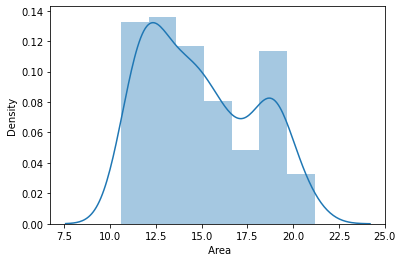

In [77]:
# Numerical Attributes Visualization
sns.distplot(df[' Area'])

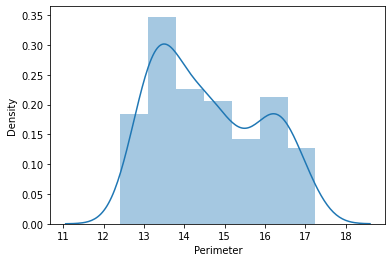

In [78]:
sns.distplot(df['Perimeter'])

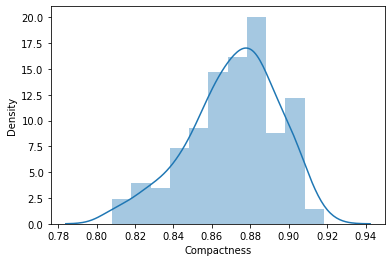

In [79]:
sns.distplot(df['Compactness'])

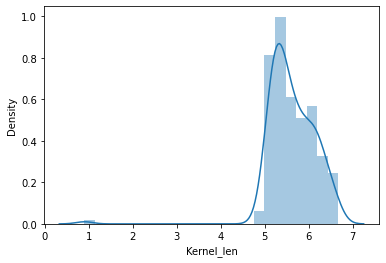

In [80]:
sns.distplot(df['Kernel_len'])

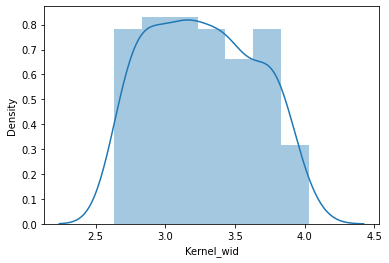

In [81]:
sns.distplot(df['Kernel_wid'])

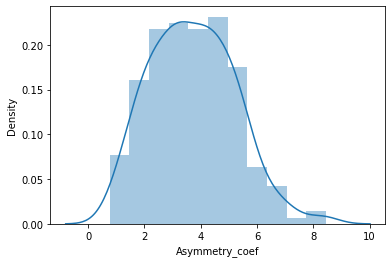

In [82]:
sns.distplot(df['Asymmetry_coef'])

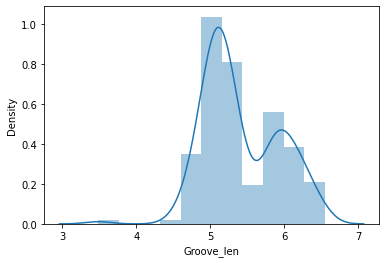

In [83]:
sns.distplot(df['Groove_len'])

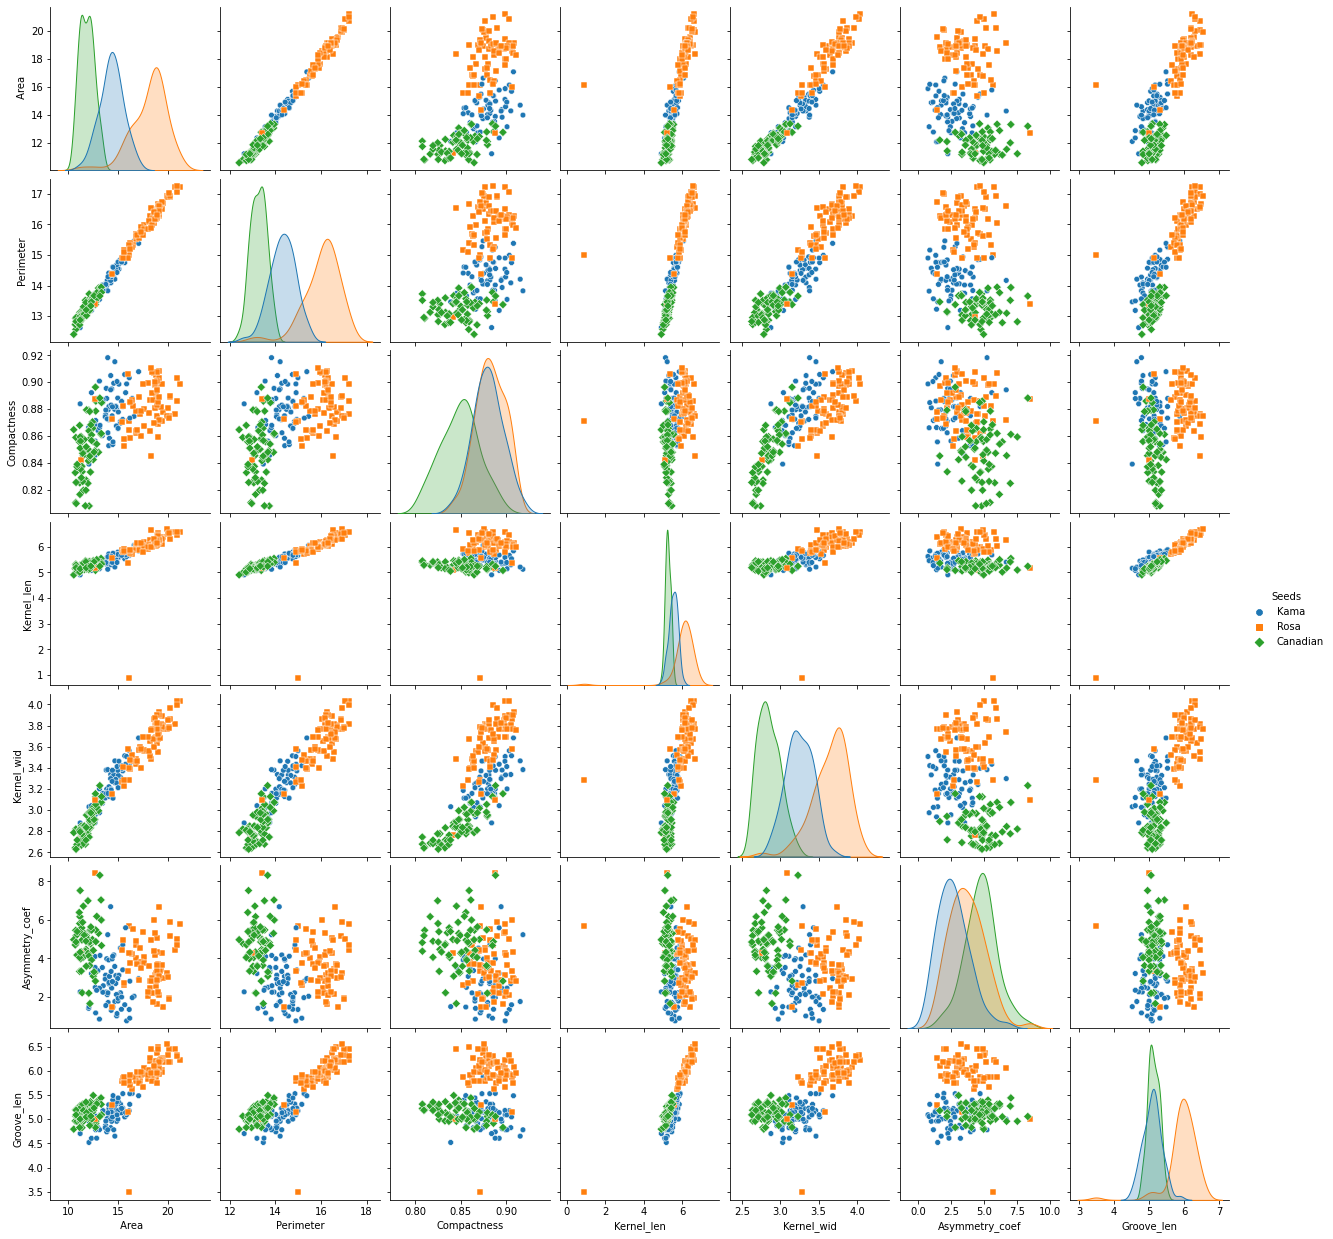

In [84]:
#Pairplot used for better detailing
sns.pairplot(df.drop(['Class'], axis=1), hue='Seeds', height=2.5, markers=["8","s","D"])

**Correlation Matrix**

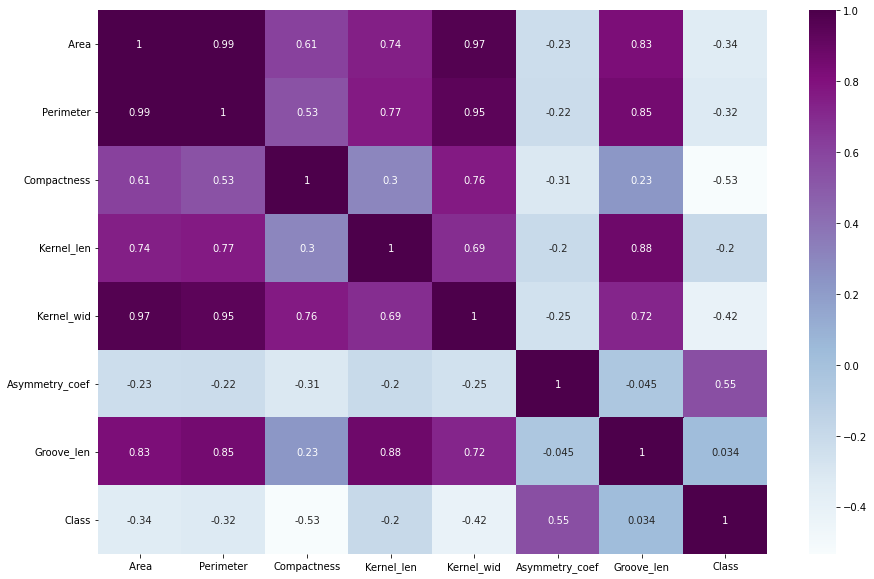

In [85]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [86]:
df.shape

(204, 9)

In [87]:
df

,Area,Perimeter,Compactness,Kernel_len,Kernel_wid,Asymmetry_coef,Groove_len,Class,Seeds
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 209
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    Area           204 non-null    float64
 1   Perimeter       204 non-null    float64
 2   Compactness     204 non-null    float64
 3   Kernel_len      204 non-null    float64
 4   Kernel_wid      204 non-null    float64
 5   Asymmetry_coef  204 non-null    float64
 6   Groove_len      204 non-null    float64
 7   Class           204 non-null    int64  
 8   Seeds           204 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 15.9+ KB


**Label Encoder**

In [89]:
from sklearn.preprocessing import LabelEncoder
cols = ['Class', "Seeds"]
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

**Train Test Split**

In [90]:
# specify input and output attributes
x = df.drop(['Class'], axis = 1)
y = df['Class']

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

**Train the Model**

In [129]:
from sklearn.neighbors import KNeighborsClassifier
k_values = {}
for i in range (2,9):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  v = {i:knn.score(x_train,y_train)}
  k_values.update(v)

In [130]:
k_values

{2: 0.9859154929577465,
 3: 0.9859154929577465,
 4: 0.9788732394366197,
 5: 0.9647887323943662,
 6: 0.9647887323943662,
 7: 0.9436619718309859,
 8: 0.9366197183098591}

In [134]:
#all_keys = k_values.keys()
#all_values = k_values.values()
#max_value = max(all_values)
#max_value = max(k_values.keys(), key=(lambda k: k_values[k]))
print("The best value for k is: ", max(k_values.keys(),key=(lambda k: k_values[k])))
print("The accuracy is: ", max(k_values.values()))


The best value for k is:  2
The accuracy is:  0.9859154929577465


In [115]:
predictions = knn.predict(x_test)
predictions

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1])

In [120]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

In [121]:
conf_matrix

array([[20,  0,  1],
       [ 2, 20,  1],
       [ 0,  0, 18]])

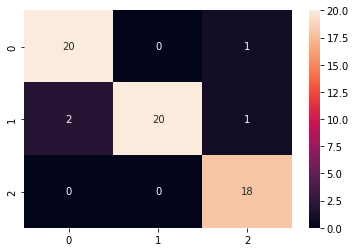

In [122]:
sns.heatmap(conf_matrix, annot=True)